### Working Demand Matrix Generation using Grid2Demand
This notebook demonstrates how to use grid2demand to build a travel demand matrix for any urban area.

In [1]:
# Setup and Imports
import os

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox

import grid2demand as gd
import osm2gmns as og

import warnings
warnings.filterwarnings('ignore')

# Ensure Directory Location and Existence

# Create output directory
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)
osm_filepath = f"{output_dir}/map.osm"

In [2]:
# Select, Download, and Save OSM Network Data for Grid2Demand Using osm2gmns Library

# OSM Area ids
# search at: nominatim.openstreetmap.org
brooklyn_id = 369518
antwerp_id = 53114
brussels_id = 2404020
ghent_id = 897671
lviv_id = 2032280

# Download directly from OSM
print("Downloading OSM network...")
og.downloadOSMData(brooklyn_id, osm_filepath)

# Open OSM, convert to GMNS, and clean as desired
print("Loading and converting OSM network to GMNS...")
net = og.getNetFromFile(osm_filepath, mode_types=['auto', 'railway', 'walk', 'bike'], POI=True)
og.fillLinkAttributesWithDefaultValues(net)
#og.consolidateComplexIntersections(net, auto_identify=True)

# Save to CSV files in GMNS format
og.outputNetToCSV(net, output_dir)

print(f"  Nodes: {net.number_of_nodes:,}")
print(f"  Links: {net.number_of_links:,}")


valid reponses got from API server.
receving data...
map data has been written to data/map.osm
Loading and converting OSM network to GMNS...


I1120 20:26:07.807349       1 functions.cpp:43] loading data from osm file
I1120 20:26:07.807797       1 osmnetwork.cpp:570] no valid boundary information in the osm file
I1120 20:26:13.413863       1 osmnetwork.cpp:601] nodes: 2008967 ways: 458439 relations: 779
W1120 20:26:13.583134       2 osmnetwork.cpp:516] unkown way member 1070098863 in relation 9457335, the relation will not be imported
I1120 20:26:13.769252       1 functions.cpp:46] start to build network
I1120 20:26:13.998616       1 functions.cpp:48] build network done
I1120 20:26:14.018223       1 io.cpp:91] writing network to csv files


  Nodes: 181,948
  Links: 306,628


I1120 20:26:14.962061       1 io.cpp:209] write network done


In [3]:
# Initialize, Load Grid2Demand Network

# Create a GRID2DEMAND object (newer API)
net = gd.GRID2DEMAND(
    input_dir=output_dir,
    mode_type='auto'
    )

# Load the network files
net.load_network()

# Generate zone.csv from node by specifying cell dimensions
# Using 400m x 400m cells for fine-grained zones
net.net2grid(cell_width=1250, cell_height=1250, unit="meter")

# Load zone from zone.csv
net.taz2zone()

# Map zones with nodes and poi, viseversa
net.map_zone_node_poi()

# Calculate zone-to-zone distance matrix
net.calc_zone_od_distance(pct=1.0)

# Specify NYC CEQR trip rate file
trip_rate_file = 'settings/brooklyn_poi_trip_rate_nyc.csv'

# RUN Gravity model with NYC trip rates and save results
net.run_gravity_model(trip_rate_file=trip_rate_file, trip_purpose=1)

net.save_results_to_csv(zone_od_dist_matrix=True, demand_od_matrix=True, overwrite_file=True)


  : Optional file: ['zone.csv'] found in /Users/dpbirge/GITHUB/custom_notebooks/4step/data.
  : Optional files could be used in the future steps.


I1120 20:26:14.967155       1 networks.cpp:260] releasing network memory
I1120 20:26:20.115154       1 networks.cpp:283] network memory released
  : Read nodes: 100%|██████████| 37/37 [00:01<00:00, 36.13it/s] 


  : Successfully loaded node.csv: 181948 Nodes loaded.
  :INFO: finished function: read_node, total: 1s 



  : Read poi: 100%|██████████| 70/70 [00:01<00:00, 67.67it/s] 


  : Successfully loaded poi.csv: 346306 POIs loaded.
  :INFO: finished function: read_poi, total: 1s 

  : Creating grid...
  : Study area boundary:  -74.0733831 -73.82541640000001 40.5706938 40.7402437
  :INFO: finished function: net2grid, total: 0s 

  : net2grid saved grids as zone.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data/zone.csv 



  : Read zone geometry: 100%|██████████| 1/1 [00:00<00:00, 989.22it/s]

  : Successfully loaded zone.csv: 170 Zones loaded.
  :INFO: finished function: read_zone_by_geometry, total: 0s 

  :INFO: finished function: taz2zone, total: 0s 

  : Mapping zones with nodes...
  : zone geometry with node...



  : Node to Zone: 100%|██████████| 170/170 [00:00<00:00, 1859.14it/s]


  :INFO: finished function: map_zone_geometry_and_node, total: 2s 

  : Mapping zones with pois...
  : zone geometry with poi...


  : POI to Zone: 100%|██████████| 170/170 [00:00<00:00, 1366.55it/s]


  :INFO: finished function: map_zone_geometry_and_poi, total: 3s 

  : Parallel calculating zone-to-zone distance matrix using 16 CPUs. Please wait...
  : Selected 170 from 100.0 % of 170 zones


  : Generating OD combinations (Combinations): 100%|██████████| 1/1 [00:00<00:00, 1782.53it/s]


  : Preparing OD coordinates for 14365 zone combinations...
  : Extracting OD coordinates in 3 chunks...


  : Calculating Distances: 100%|██████████| 17/17 [00:00<00:00, 20239.33it/s]

  : Successfully calculated zone-to-zone distance matrix.
  :INFO: finished function: calc_zone_od_matrix, total: 0s 



  : Successfully generated OD demands.
  : Successfully saved demand.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data
  : Successfully saved zone.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data
  : Successfully saved updated node to node.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data
  : Successfully saved updated poi to poi.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data
  : Successfully saved zone_od_dist_matrix.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data
  : Successfully saved demand_od_matrix.csv to /Users/dpbirge/GITHUB/custom_notebooks/4step/data


True

Testing basemap with zone boxes, numbers, and OD pairs...
Loaded 170 zones
Note: No population column in zone.csv
Filtered to 170 zones with demand
Calculating combined bidirectional trips...
✓ Selected top 200 OD pairs by combined volume
✓ Plotted 200 OD pairs
  Line width range: 1.0 - 6.0
✓ Added 170 zone labels with POI counts
Adding basemap...


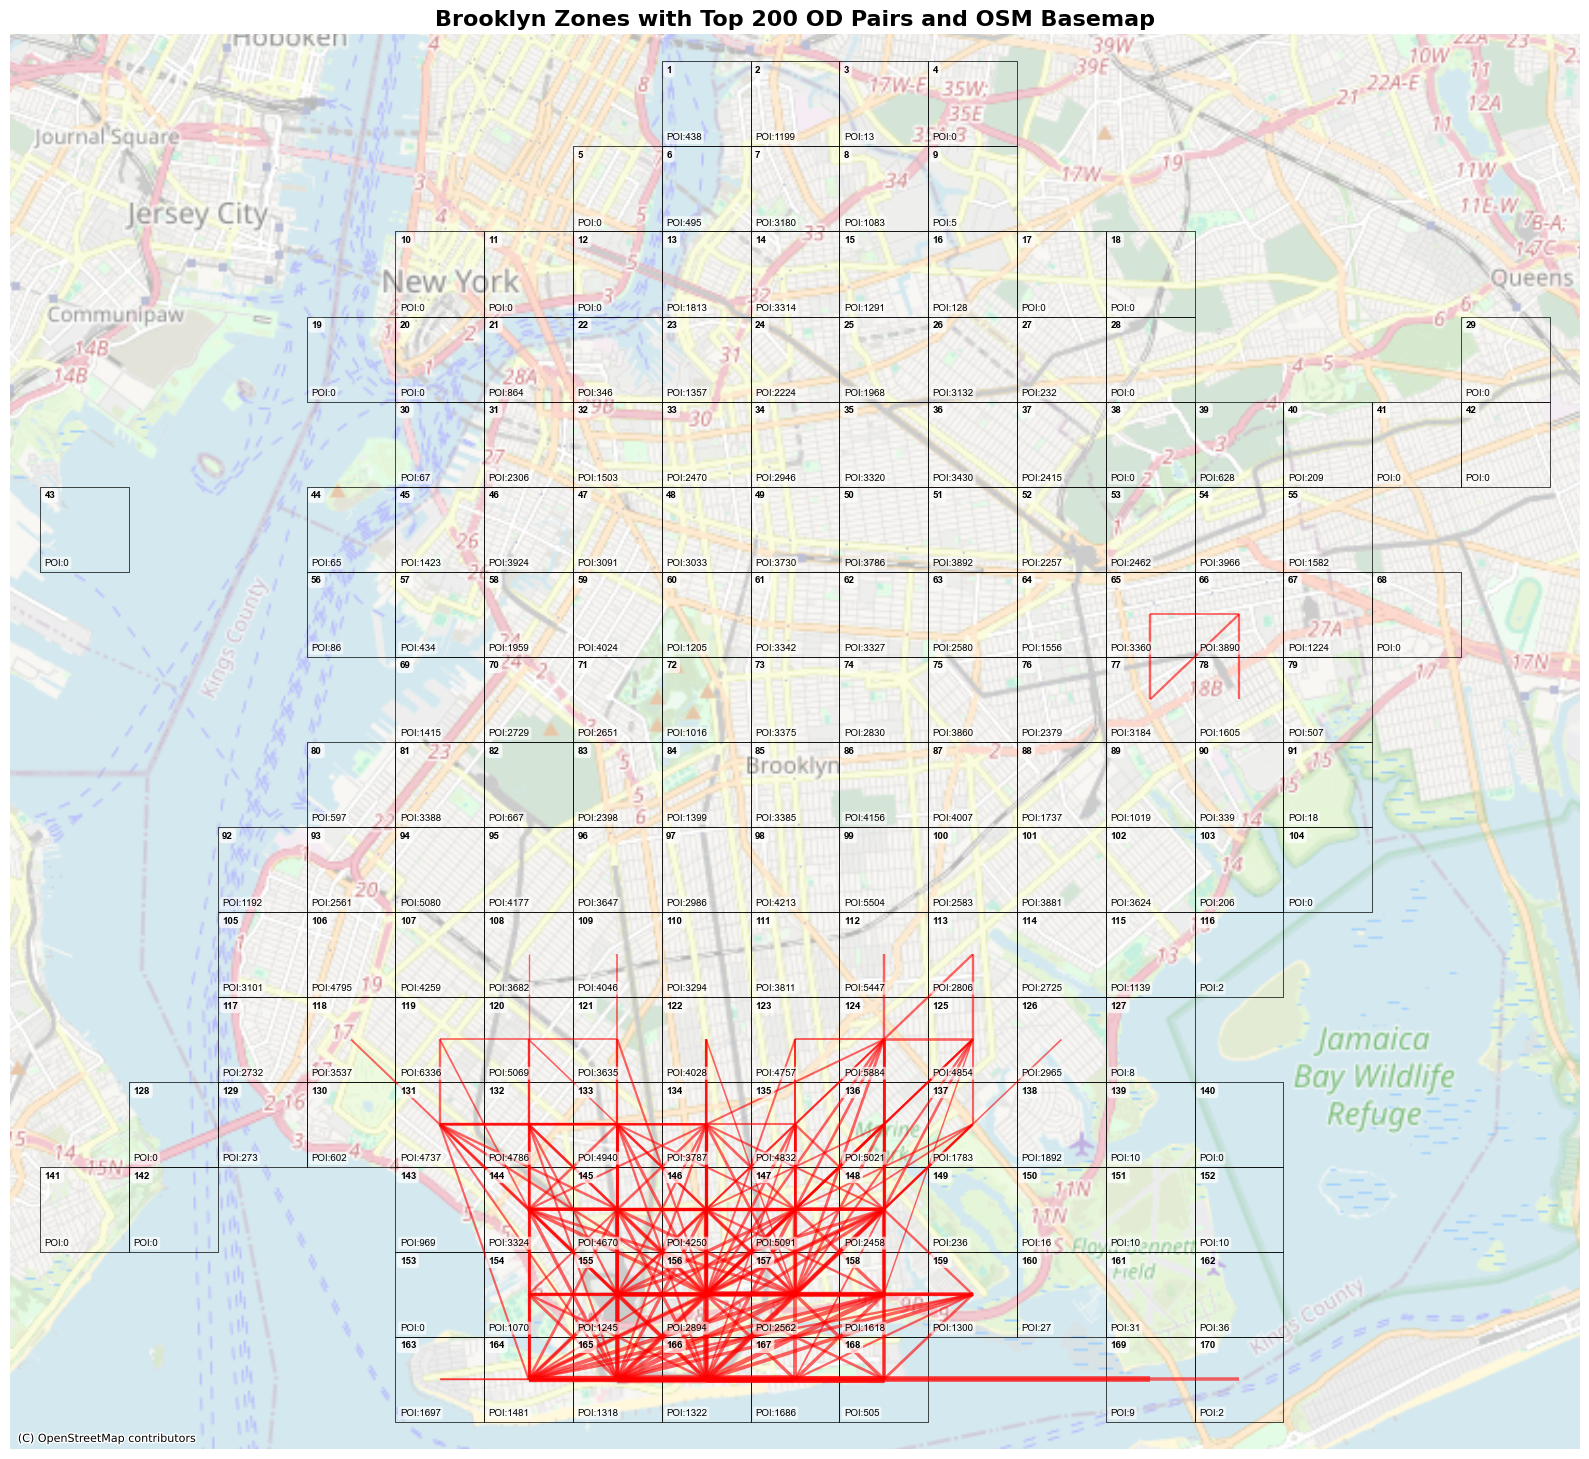

✓ Test complete!
  170 zone boxes plotted
  200 OD pairs plotted
  Top 200 volume range: 7466 - 85510


In [4]:
# Plot Results
from utils.plot_brooklyn_results import plot_results
plot_results(output_dir)